In [3]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("/content/Student data.csv")
df.shape
df

,ID number,race/ethnicity,gender,class,parental level of education,lunch,test preparation course,math score,Science score,English score
0,1,group B,female,9,bachelor's degree,standard,none,72,72,74
1,2,group C,female,9,some college,standard,completed,69,90,88
2,3,group B,female,9,master's degree,standard,none,90,95,93
3,4,group A,male,9,associate's degree,free/reduced,none,47,57,44
4,5,group C,male,9,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...,...
195,196,group C,female,9,associate's degree,standard,completed,69,84,85
196,197,group D,male,9,some high school,standard,none,61,55,52
197,198,group C,male,9,high school,free/reduced,completed,59,69,65
198,199,group E,male,9,some college,free/reduced,none,55,56,51


TABLE OF STUDENT DATA WITH TEST SCORES

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
df.describe()

,ID number,race/ethnicity,gender,class,parental level of education,lunch,test preparation course,mean
count,200.000000,200.000000,200.00000,200.0,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2.140000,0.50500,9.0,2.465000,0.645000,0.635000,66.040000
std,57.879185,1.160662,0.50123,0.0,1.848203,0.479714,0.482638,15.392957
min,1.000000,0.000000,0.00000,9.0,0.000000,0.000000,0.000000,9.000000
25%,50.750000,1.000000,0.00000,9.0,1.000000,0.000000,0.000000,55.000000
50%,100.500000,2.000000,1.00000,9.0,2.000000,1.000000,1.000000,66.000000
75%,150.250000,3.000000,1.00000,9.0,4.000000,1.000000,1.000000,77.250000
max,200.000000,4.000000,1.00000,9.0,5.000000,1.000000,1.000000,100.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID number                    200 non-null    int64  
 1   race/ethnicity               200 non-null    int64  
 2   gender                       200 non-null    int64  
 3   class                        200 non-null    int64  
 4   parental level of education  200 non-null    int64  
 5   lunch                        200 non-null    int64  
 6   test preparation course      200 non-null    int64  
 7   mean                         200 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


In [2]:
df.columns

Index(['ID number ', 'race/ethnicity', 'gender', 'class',
       'parental level of education', 'lunch', 'test preparation course',
       'math score', 'Science score', 'English score '],
      dtype='object')

IDENTIFYING MISSING VALUES

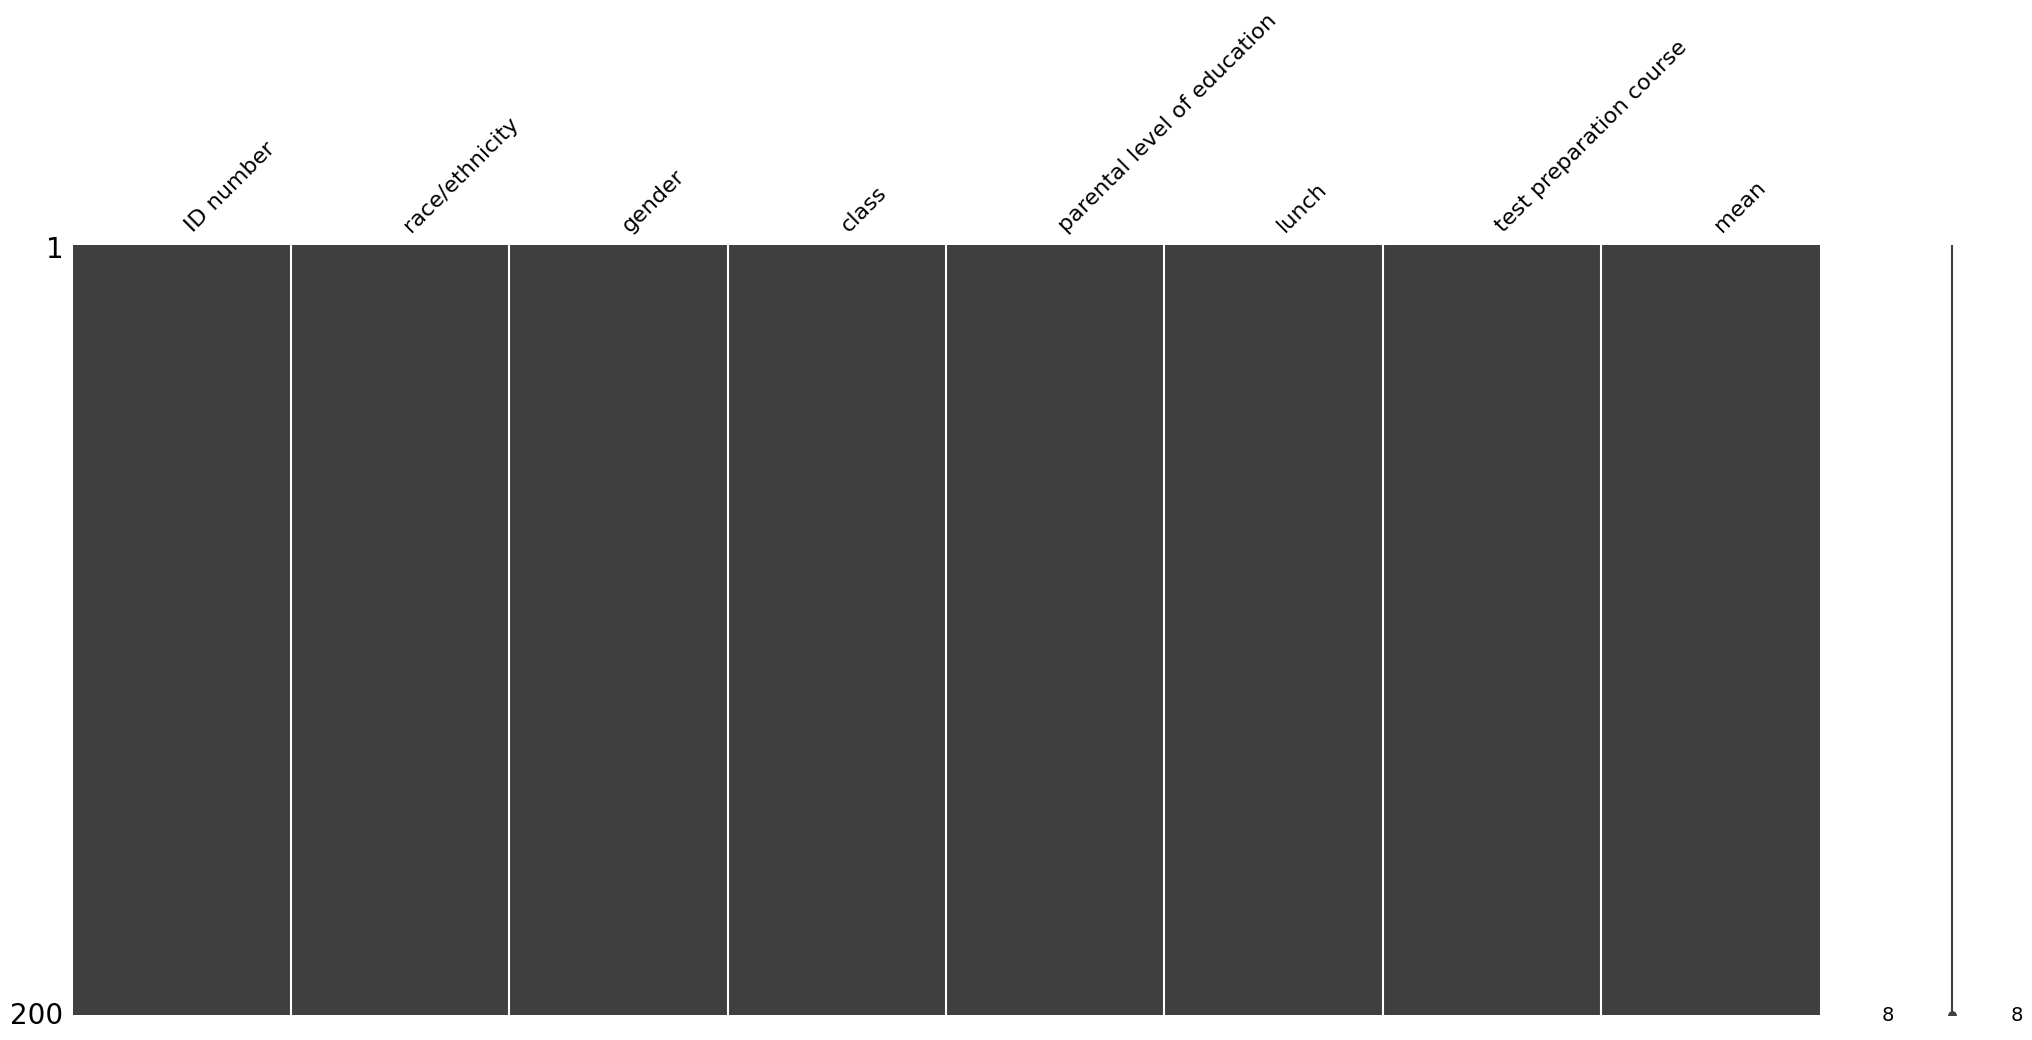

In [67]:
msno.matrix(df);

In [68]:
df.isna().sum()

ID number                      0
race/ethnicity                 0
gender                         0
class                          0
parental level of education    0
lunch                          0
test preparation course        0
mean                           0
dtype: int64

CALCULATING MEAN SCORES :

In [107]:
#pandas
df["mean"] = ((df["math score"] + df["Science score"] + df["English score "]) / 3).round()
df.head()

,ID number,race/ethnicity,gender,class,parental level of education,lunch,test preparation course,math score,Science score,English score,mean
0,1,group B,female,9,bachelor's degree,standard,none,72,72,74,73.0
1,2,group C,female,9,some college,standard,completed,69,90,88,82.0
2,3,group B,female,9,master's degree,standard,none,90,95,93,93.0
3,4,group A,male,9,associate's degree,free/reduced,none,47,57,44,49.0
4,5,group C,male,9,some college,standard,none,76,78,75,76.0


ADDING GRADES

In [108]:
#initializing the passmarks
#pandas
passmark=35
def Grade(mean):
    if (mean >= 95):return 'O'
    if (mean >= 81):return 'A'
    if (mean >= 71):return 'B'
    if (mean >= 61):return 'C'
    if (mean >= 51):return 'D'
    if (mean >= 41):return 'E'
    else: return 'F'

df["grade"] = df.apply(lambda x : Grade(x["mean"]), axis=1)
df

,ID number,race/ethnicity,gender,class,parental level of education,lunch,test preparation course,math score,Science score,English score,mean,grade
0,1,group B,female,9,bachelor's degree,standard,none,72,72,74,73.0,B
1,2,group C,female,9,some college,standard,completed,69,90,88,82.0,A
2,3,group B,female,9,master's degree,standard,none,90,95,93,93.0,A
3,4,group A,male,9,associate's degree,free/reduced,none,47,57,44,49.0,E
4,5,group C,male,9,some college,standard,none,76,78,75,76.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,group C,female,9,associate's degree,standard,completed,69,84,85,79.0,B
196,197,group D,male,9,some high school,standard,none,61,55,52,56.0,D
197,198,group C,male,9,high school,free/reduced,completed,59,69,65,64.0,C
198,199,group E,male,9,some college,free/reduced,none,55,56,51,54.0,D


MALE FEMALE REPRESENTATION

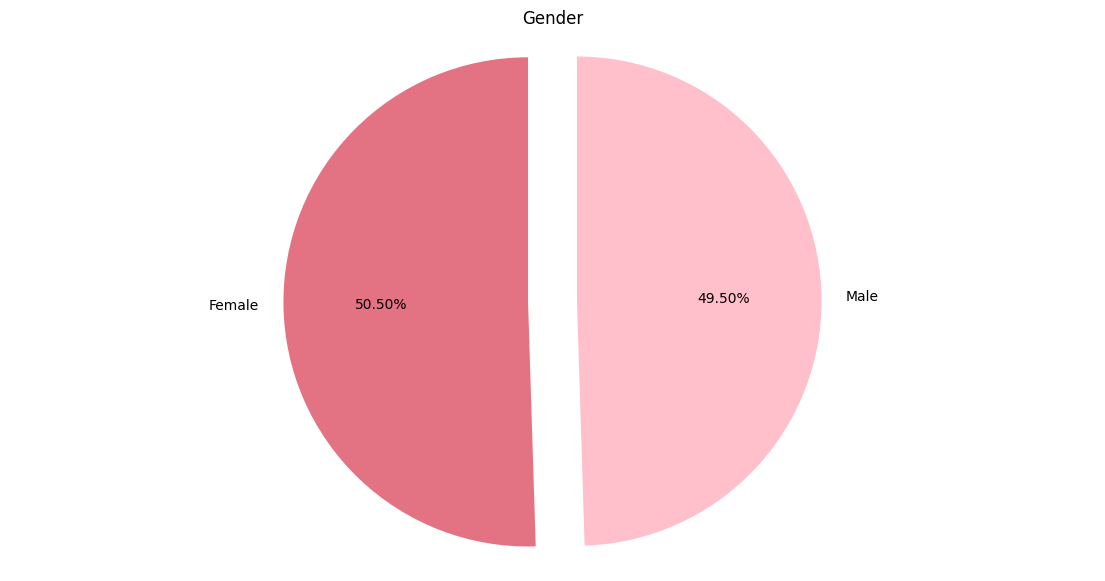

In [74]:
#matplotlib
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

In [5]:
df['gender'].value_counts()

male      101
female     99
Name: gender, dtype: int64

GENDER V/S GRADES GRAPH :

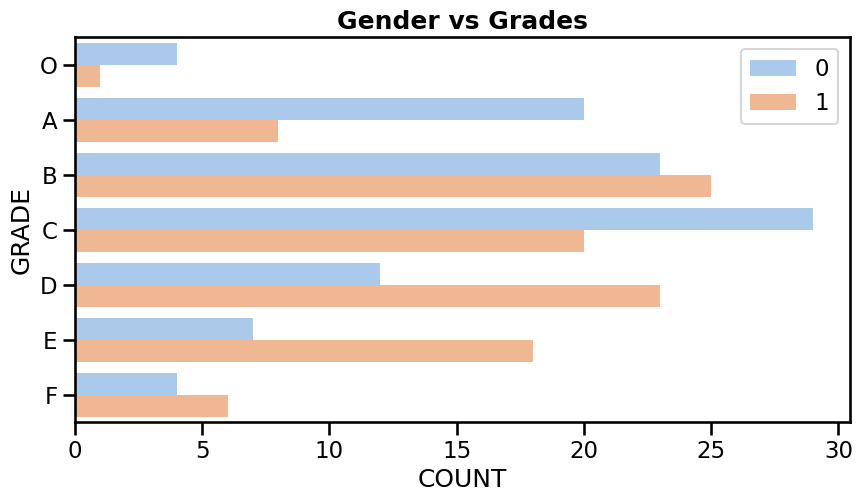

In [75]:
#seaborn
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

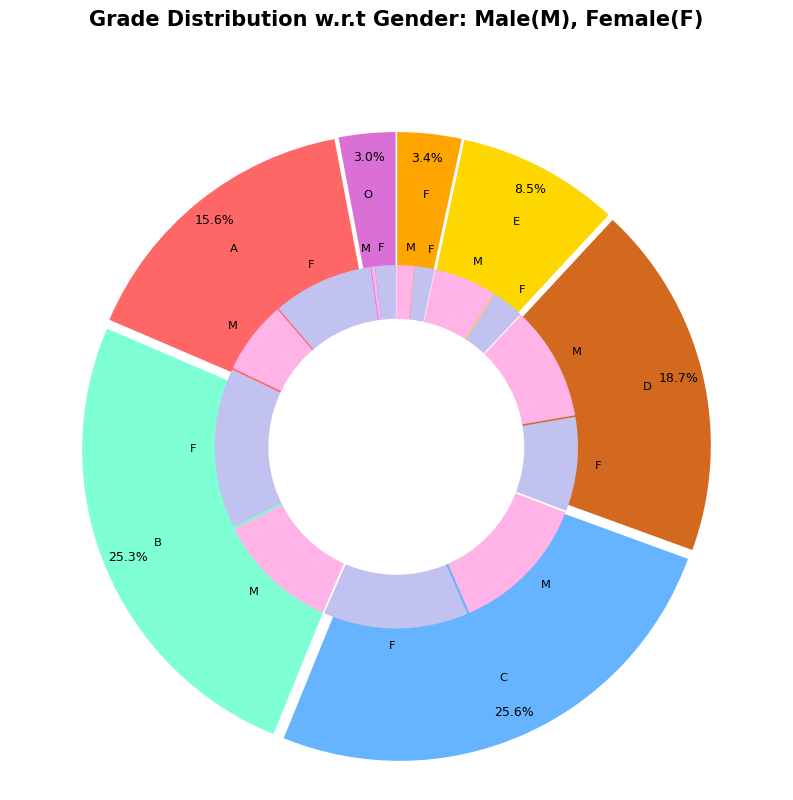

In [96]:
plt.figure(figsize=(8, 8))
labels =["O","A","B","C","D","E","F"]
values = [30,157,255,258,188,86,34]
labels_gender = ["F","M","F","M","F","M","F","M","F","M","F","M","F","M"]
sizes_gender = [19,3,91,66,145,110,131,127,85,103,29,57,18,16]
colors = ['orchid', '#ff6666', 'aquamarine', '#66b3ff','chocolate','gold','orange']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3,0.3,0.3,0.3,0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%' ,pctdistance=0.92, labeldistance=0.80,colors=colors, startangle=90,frame=True, explode=explode,radius=12)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7)
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold',y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

From the above visualization we infer:

The majority of students who earned an O grade were female.

Majority of students received C grade followed by B.

More female students received A and B Grade relative to male students.

More number of boys received D and E grade.

Almost similar number of both, male and female, got F grade.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head()

Text(0.5, 1.0, 'Gender v/s Race/Ethnicity analysis : ')

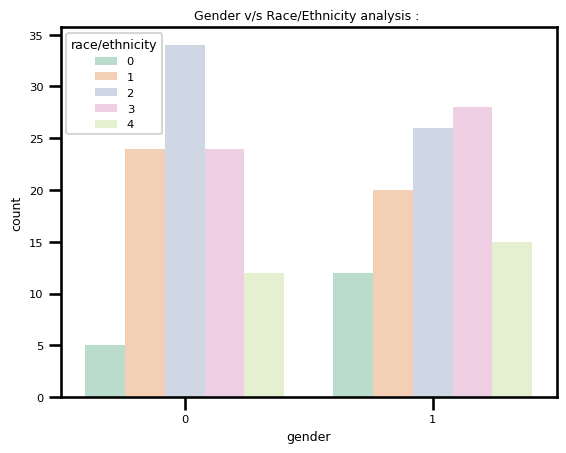

In [113]:
sns.countplot(x = df['gender'], hue = df['race/ethnicity'])
plt.title("Gender v/s Race/Ethnicity analysis : ")

from the above visualization : we can infer that ,

Females belonging to group 2 have performed the best

Males belonging to group 3 have performed the best

In [114]:
df['test preparation course'].value_counts()

1    127
0     73
Name: test preparation course, dtype: int64

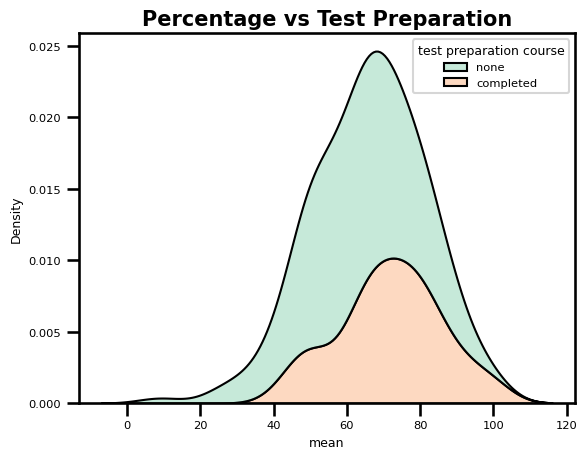

In [109]:
sns.set_context("talk",font_scale=0.5)
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="mean", hue="test preparation course", multiple="stack")
plt.title('Percentage vs Test Preparation',fontsize=15, fontweight='bold')
plt.show()

we can say that students who have completed the preparation course have performed better

Text(0.5, 0, ' 0 = Free/reduced lunch     ,      1 = standard lunch  ---->')

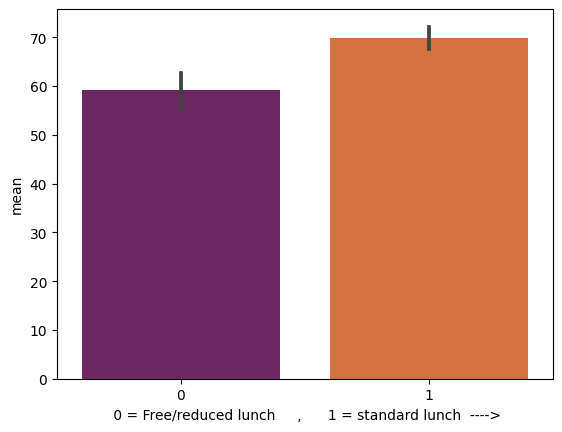

In [32]:
sns.barplot(x = df['lunch'], y = df['mean'], palette = 'inferno')
plt.xlabel(" 0 = Free/reduced lunch     ,      1 = standard lunch  ---->")

We can derive from the graph that students who eat standard lunch perform better

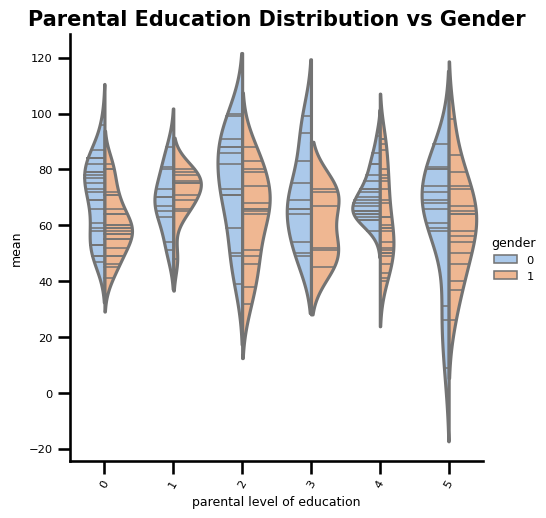

In [90]:
sns.catplot(x="parental level of education", y="mean", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)
plt.title('Parental Education Distribution vs Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

From this , we can say that students parents who hold a masters degree are likely to perform better followed by bacheolars degree

<Figure size 1200x600 with 0 Axes>

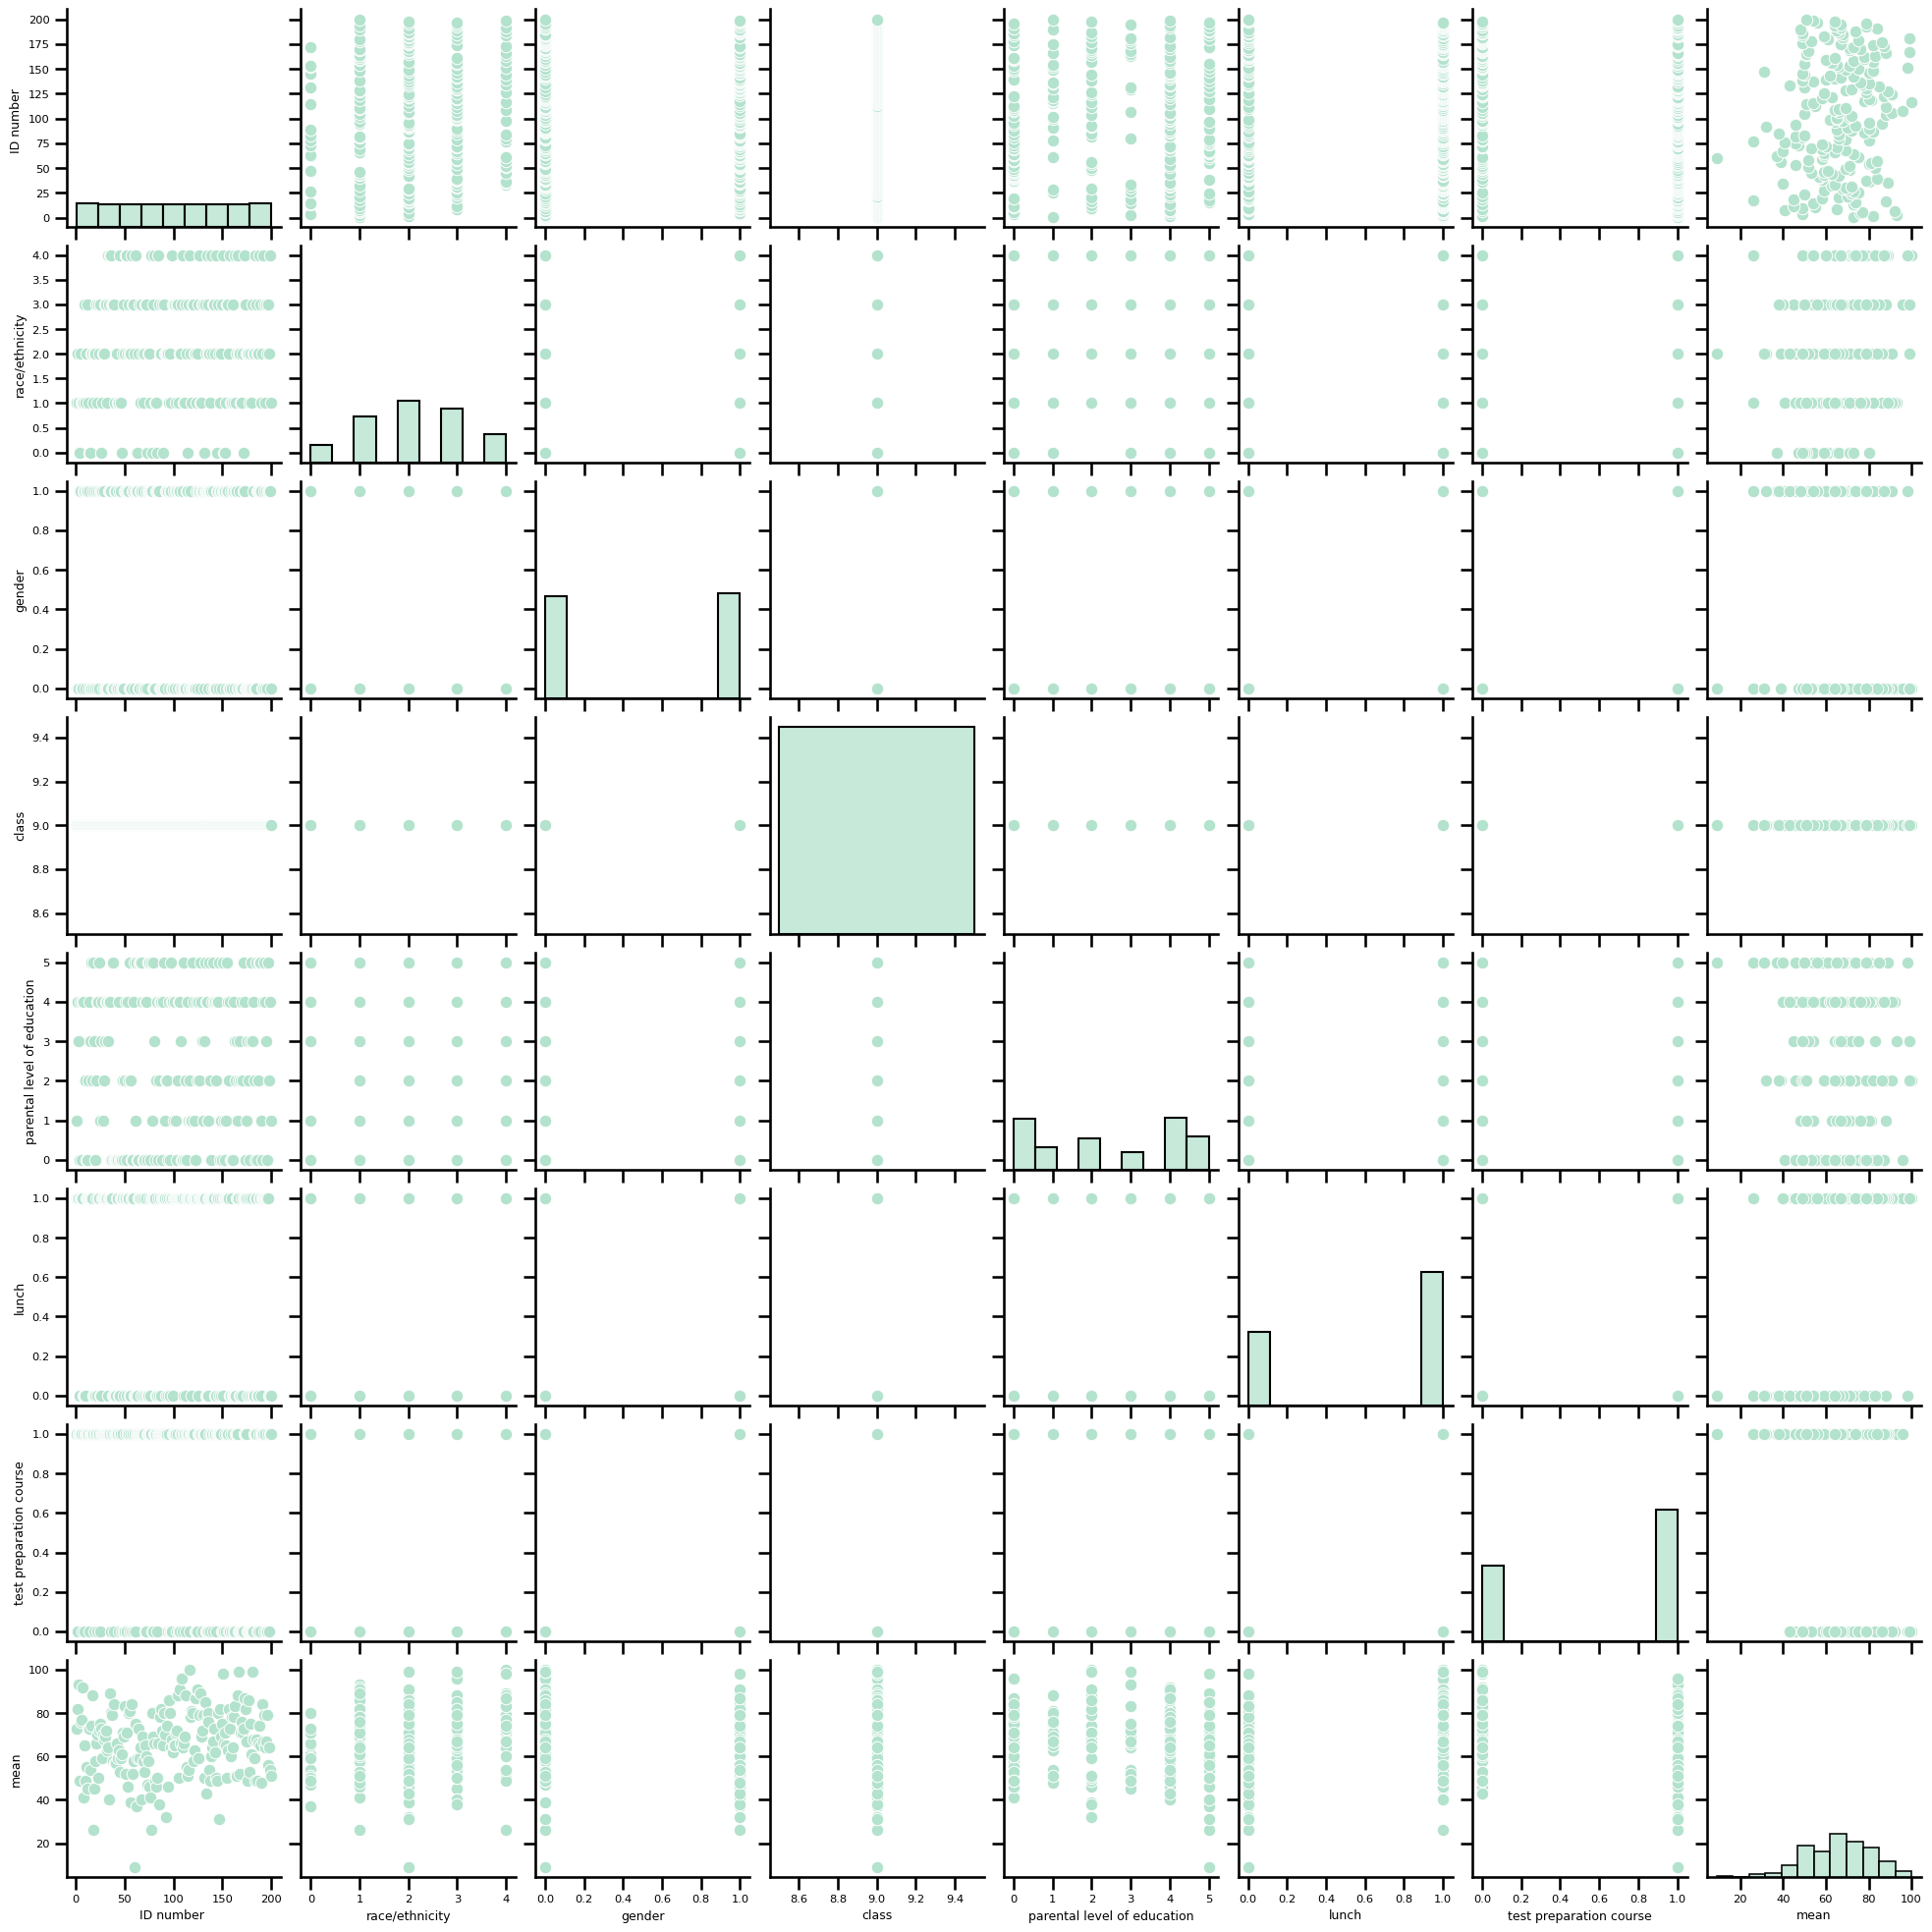

In [91]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

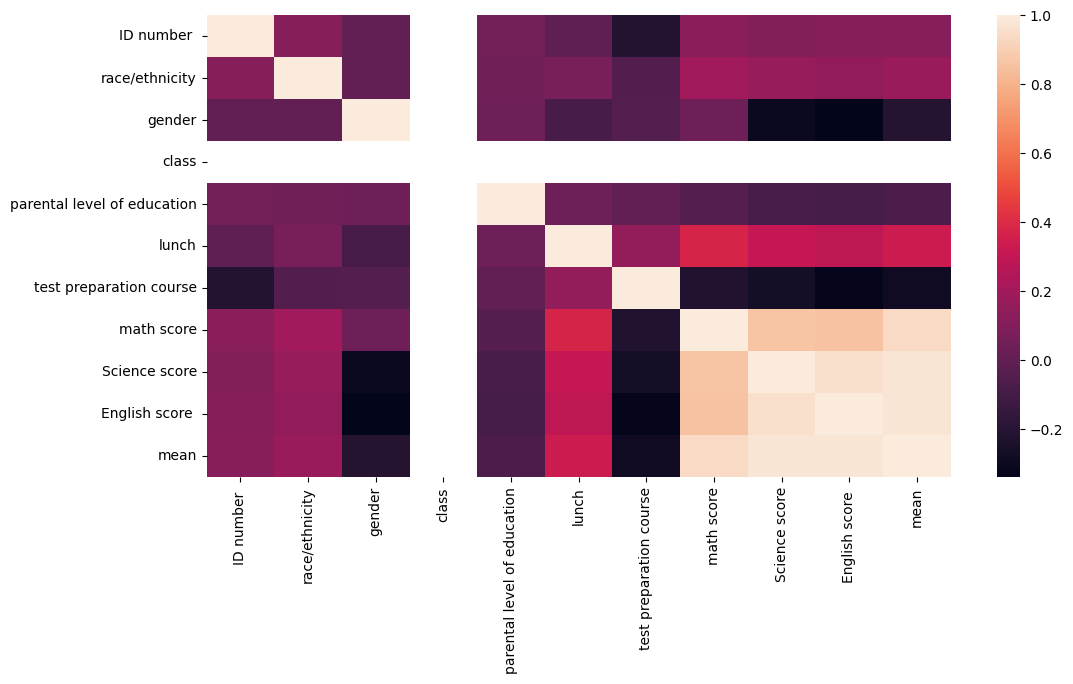

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [8]:
df = df.drop(['math score', 'Science score', 'English score '],axis = 1)
df.head()

,ID number,race/ethnicity,gender,class,parental level of education,lunch,test preparation course,mean
0,1,1,0,9,1,1,1,73.0
1,2,2,0,9,4,1,0,82.0
2,3,1,0,9,3,1,1,93.0
3,4,0,1,9,0,0,1,49.0
4,5,2,1,9,4,1,1,76.0


In [55]:
from sklearn.model_selection import train_test_split
y = df['mean']
x = df.drop(['mean'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)
df

,ID number,race/ethnicity,gender,class,parental level of education,lunch,test preparation course,mean
0,1,1,0,9,1,1,1,73.0
1,2,2,0,9,4,1,0,82.0
2,3,1,0,9,3,1,1,93.0
3,4,0,1,9,0,0,1,49.0
4,5,2,1,9,4,1,1,76.0
...,...,...,...,...,...,...,...,...
195,196,2,0,9,0,1,0,79.0
196,197,3,1,9,5,1,1,56.0
197,198,2,1,9,2,0,0,64.0
198,199,4,1,9,4,0,1,54.0


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [58]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [84]:
predictions = model.predict(x_test)

In [79]:
predictions

array([65., 59., 40., 75., 67., 64., 75., 93., 72., 49., 51., 46., 55.,
       72., 49., 65., 49., 75., 50., 26., 75., 59., 58., 73., 73., 75.,
       75., 59., 51., 73., 73., 79., 79., 49., 99., 65., 49., 50., 66.,
       79.])

In [85]:
y_test

58     58.0
40     57.0
34     89.0
102    72.0
184    68.0
198    54.0
95     80.0
4      76.0
29     69.0
168    71.0
171    73.0
18     45.0
11     45.0
89     80.0
110    69.0
118    80.0
159    78.0
35     80.0
136    54.0
59      9.0
51     71.0
16     88.0
44     53.0
94     86.0
31     63.0
162    83.0
38     84.0
28     68.0
193    64.0
27     70.0
47     71.0
165    88.0
194    67.0
177    53.0
176    86.0
97     68.0
174    67.0
73     58.0
69     53.0
172    87.0
Name: mean, dtype: float64

In [86]:
difference = abs(predictions - y_test)
difference

58      7.0
40      2.0
34     49.0
102     3.0
184     1.0
198    10.0
95      5.0
4      17.0
29      3.0
168    22.0
171    22.0
18      1.0
11     10.0
89      8.0
110    20.0
118    15.0
159    29.0
35      5.0
136     4.0
59     17.0
51      4.0
16     29.0
44      5.0
94     13.0
31     10.0
162     8.0
38      9.0
28      9.0
193    13.0
27      3.0
47      2.0
165     9.0
194    12.0
177     4.0
176    13.0
97      3.0
174    18.0
73      8.0
69     13.0
172     8.0
Name: mean, dtype: float64

In [63]:
difference.mean()

11.075